Для начала нужно подключить библиотеки для работы с изображением

In [1]:
from PIL import Image
import random
import os

Далее создаем переменные rand_folder и folder. Так как у нас 7 папок, то и диапозон будет соответсвующий. Мы создаем список images по указаному пути, где находяться изображения

In [2]:
rand_folder = random.randint(1, 7)
folder = f'../data/DATASET/train/{rand_folder}'
images = [f for f in os.listdir(folder)
          if f.lower().endswith(('.jpg'))]

Далее нам нужно выбрать изображение случайным образом и написать полный путь к изображению

In [3]:
random_image = random.choice(images)
image_path = os.path.join(folder, random_image)

После создаем переменную photo и photo_data. В photo открываем само изображение, а в photo_data предмтавляем цвета в численное представление. В данном случае это будет список каждого пикселя в формате RGB.

In [4]:
photo = Image.open(image_path)
photo_data = list(photo.getdata())
print(image_path)
print(photo.size)
print(photo.mode)
print(photo_data)

../data/DATASET/train/7/train_11753_aligned.jpg
(100, 100)
RGB
[(77, 45, 24), (78, 46, 25), (84, 49, 29), (89, 54, 32), (99, 61, 40), (109, 68, 46), (118, 76, 52), (125, 79, 55), (136, 88, 65), (141, 91, 64), (149, 95, 69), (155, 101, 73), (165, 108, 79), (172, 115, 86), (182, 121, 92), (185, 124, 95), (186, 125, 96), (185, 124, 95), (185, 124, 95), (185, 124, 95), (185, 126, 96), (186, 127, 97), (188, 129, 97), (190, 131, 99), (191, 135, 102), (193, 137, 104), (196, 142, 108), (200, 146, 112), (205, 151, 115), (210, 156, 120), (213, 159, 123), (216, 160, 125), (218, 160, 123), (221, 161, 125), (224, 166, 129), (227, 169, 132), (229, 173, 138), (231, 175, 140), (231, 177, 141), (231, 177, 141), (236, 183, 149), (236, 183, 149), (234, 184, 151), (232, 182, 149), (231, 182, 149), (233, 184, 151), (238, 189, 156), (242, 193, 160), (243, 194, 164), (243, 194, 164), (242, 193, 161), (242, 193, 161), (242, 192, 159), (241, 191, 156), (243, 190, 156), (242, 190, 153), (242, 190, 151), (240, 1

Ответы на вопросы по первому этапу:
1. Режим изображений RGB, размер изображений 100х100. Все изображения в датасете имеют одинаковый размер
2. Изображение численно представленно в виде списка, состоящего из 10000 элементов(т.к. размер изображения 100х100). Каналы - это отдельные компоненты цвета, из котрых сосотоит полное изображения. В исходном изображение 3 канала типа RGB.
3. Пиксели имееют тип данных кортеж. В кортежележит три числа, они принимают значения от 0 до 255, например: (167, 144, 113)

Этап 2:
Нужно подключить библиотку torchvision.transforms

In [5]:
import torch
import torchvision.transforms as t

Далее мы создаем переменную pipline, где используем Grayscale, Resize,ToTensor и Normalize

In [6]:
pipline = t.Compose([
    t.Grayscale(num_output_channels=1),
    t.Resize((100, 100)),
    t.ToTensor(),
    t.Normalize(mean=[0.5], std=[0.5])
])

После создаем переменную transofrm_image, где в наш конфеер кладём не трансформированное фото

In [7]:
transform_image = pipline(photo)
print(transform_image)

tensor([[[-0.5922, -0.5843, -0.5529,  ..., -0.3804, -0.3882, -0.3804],
         [-0.4275, -0.4118, -0.3804,  ..., -0.3804, -0.3961, -0.3961],
         [-0.3020, -0.2863, -0.2627,  ..., -0.3725, -0.4039, -0.4118],
         ...,
         [-0.4588, -0.4588, -0.4745,  ..., -0.1608, -0.1843, -0.1922],
         [-0.4275, -0.4275, -0.4510,  ...,  0.0039, -0.1529, -0.2471],
         [-0.4118, -0.4118, -0.4353,  ...,  0.3255,  0.0510, -0.0902]]])


Ответы на вопросы:
1. Будет полезно избавиться от цветов, т.к. нам нужна геометрия лица, модель будет сфокусирована именно на объекте. Численное пердстваление изменилось, теперь у нас только 1 канал.
2. Нужно в батче иметь одинаковый размер, т.к. модель даст лучшие результаты, если все фотографии будут 1 размера
3. Трансформация преобразует все в тензор типа float32. c диапазоном данных [0, 1]. а также получили массив
4. Нормализация нужна для ускорения обучения, помощи к градиентному спуску, а также для повышения тончости. ДЛя черно-белого изображения стоит писать в mean и std [0.5]

Этап 3: Для начала подключим pandas, matplotlib.pyplot, toPILImage

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

При помощи pandas откроем csv таблицу train_labels

In [9]:
data = pd.read_csv('../data/train_labels.csv')

По скольку у нас 7 эмоций, то считать количевство изображений будем через значение labe = номер_папки, где номер_папки обазначает папку, где храняться изображения некоторых эмоций. Посчитаем количевство всех 7 папок

In [10]:
result_wonder = (data['label'] == 1).sum()
result_scared = (data['label'] == 2).sum()
result_disgust = (data['label'] == 3).sum()
result_happy = (data['label'] == 4).sum()
result_sad = (data['label'] == 5).sum()
result_angry = (data['label'] == 6).sum()
result_neutral = (data['label'] == 7).sum()

Для визуализаций количевста изображенйи для каждой эмоции нужно построить график при помощи matplotlib. Где за x возбмем список эмоций, а за y возьмем посчитаное количевство. После построим столбчатую диаграмму

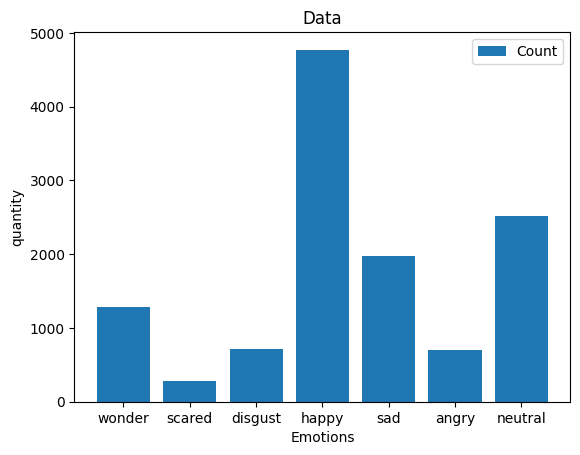

In [11]:
x = ['wonder', 'scared', 'disgust', 'happy', 'sad', 'angry', 'neutral']
y = [result_wonder, result_scared, result_disgust, result_happy, result_sad, result_angry, result_neutral]

plt.bar(x, y, label = 'Count')
plt.xlabel('Emotions')
plt.ylabel('quantity')
plt.title('Data')
plt.legend()
plt.show()

Далее напишем функцию визуализации, где мы сравним оригинальное изображение, чёрно-белое изображение, а также финальный тензор после всех преобразований. У функции будут 2 аргумента, это путь оригинального изображения и тензор. Функция будет сразу делать график

In [12]:
def visualize(image_path, tensor_image):
    image = Image.open(image_path)
    gray_image = image.convert('L')
    to_pil = ToPILImage()
    final_image = to_pil(tensor_image)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image)
    axes[0].set_title("Оригинал")
    axes[0].axis("off")

    axes[1].imshow(gray_image, cmap="gray")
    axes[1].set_title("Grayscale")
    axes[1].axis("off")

    axes[2].imshow(final_image, cmap="gray")
    axes[2].set_title("После преобразований")
    axes[2].axis("off")

    plt.show()

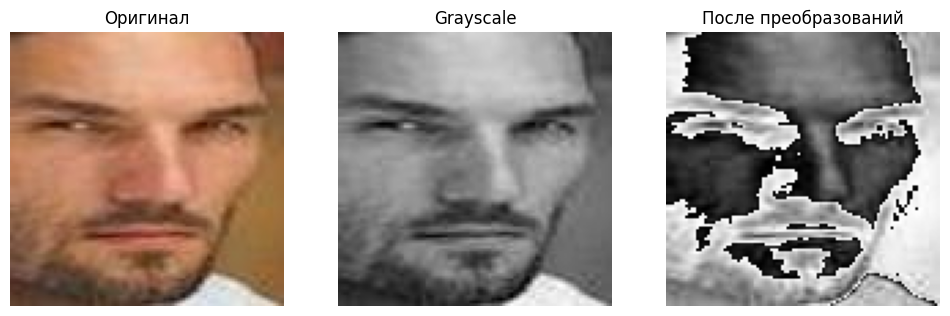

In [13]:
visualize(image_path, transform_image)

Ответы на вопросы:
1. Датасет не являетться сбалансированым. Глядя на гистограмму, больше всего представленны эмоции счастья(около 5 тыс.), меньше всего эмоций страза(около 300). Модель будет лучше понимать счастье, чем страх. Возможно будут ошибочные предсказания.
2. После всех преобразований на чертах лица появились артефакты. Артефакты появились на губах, глаз, на носу. Само лицо обвелось. Черты остаються.

Гистограмма для изображенийв папке test

In [14]:
data_test = pd.read_csv('../data/test_labels.csv')

In [15]:
test_wonder_result = (data_test['label'] == 1).sum()
test_scared_result = (data_test['label'] == 2).sum()
test_disgust_result = (data_test['label'] == 3).sum()
test_happy_result = (data_test['label'] == 4).sum()
test_sad_result = (data_test['label'] == 5).sum()
test_angry_result = (data_test['label'] == 6).sum()
test_neutral_result = (data_test['label'] == 7).sum()

In [16]:
a = ['wonder', 'scared', 'disgust', 'happy', 'sad', 'angry', 'neutral']
b = [test_wonder_result, test_scared_result, test_disgust_result, test_happy_result, test_sad_result, test_angry_result, test_neutral_result]

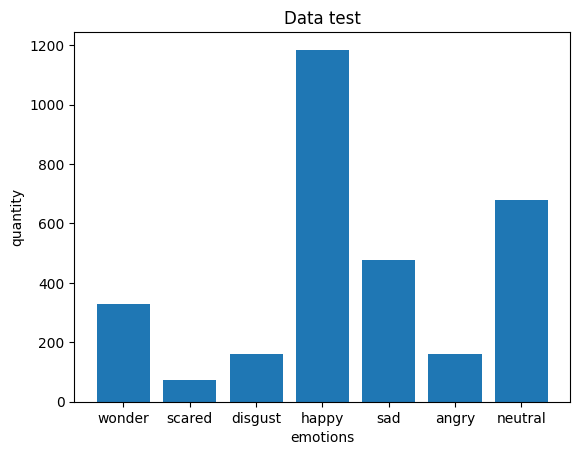

In [ ]:
plt.bar(a, b, label = 'Count')
plt.title('Data test')
plt.xlabel('emotions')
plt.ylabel('quantity')
plt.legend()
plt.show()